In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from google.colab import files

from google.colab import files
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
'''

# Path to your local file in Google Drive
local_file_path = '/content/drive/My Drive/path_to_your_file/file.txt'

# Read the file
with open(local_file_path, 'r') as file:
    content = file.read()
    print(content)

'''

"\n\n# Path to your local file in Google Drive\nlocal_file_path = '/content/drive/My Drive/path_to_your_file/file.txt'\n\n# Read the file\nwith open(local_file_path, 'r') as file:\n    content = file.read()\n    print(content)\n\n"

In [4]:
# Upload file from your local computer to Google Colab
uploaded = files.upload()

# Datasets diambil di :  https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Saving gambar_biner.csv to gambar_biner.csv


In [5]:
# Process the uploaded file
for filename in uploaded.keys():
    print('Uploaded file "{name}" with length {length} bytes'.format(
        name=filename, length=len(uploaded[filename])))

    # Read the content of the uploaded file
    with open(filename, 'r') as file:
        content = file.read()
        print('File content:')
        print(content)


Uploaded file "gambar_biner.csv" with length 2109 bytes
File content:
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
255,255,255,255,255,255,255,255,255,255,0,0,0,255,0,255,255,255,2

In [6]:
# Upload file from your local computer to Google Colab
uploaded = files.upload()

# Process the uploaded file
for filename in uploaded.keys():
    print('Uploaded file "{name}" with length {length} bytes'.format(
        name=filename, length=len(uploaded[filename])))

    # Read the content of the uploaded file and create a DataFrame
    df = pd.read_csv(filename)

# Display the DataFrame
print("DataFrame from uploaded file:")
print(df)


Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv
Uploaded file "heart_failure_clinical_records_dataset.csv" with length 12239 bytes
DataFrame from uploaded file:
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0   

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
'''
Additional Variable Information
Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- creatinine phosphokinase  (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction  (percentage)
- high blood pressure: if the patient has hypertension (boolean)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient died during the follow-up period (boolean)
'''

'\nAdditional Variable Information\nThirteen (13) clinical features:\n\n- age: age of the patient (years)\n- anaemia: decrease of red blood cells or hemoglobin (boolean)\n- creatinine phosphokinase  (CPK): level of the CPK enzyme in the blood (mcg/L)\n- diabetes: if the patient has diabetes (boolean)\n- ejection fraction: percentage of blood leaving the heart at each contraction  (percentage)\n- high blood pressure: if the patient has hypertension (boolean)\n- platelets: platelets in the blood (kiloplatelets/mL)\n- sex: woman or man (binary)\n- serum creatinine: level of serum creatinine in the blood (mg/dL)\n- serum sodium: level of serum sodium in the blood (mEq/L)\n- smoking: if the patient smokes or not (boolean)\n- time: follow-up period (days)\n- [target] death event: if the patient died during the follow-up period (boolean)\n'

In [9]:
'''
1. Lakukan eksplorasi data seperti data statistik (mean, median, min, max,dll) dan lihat distribusi datanya. lakukan Visualisasi
2. Preprocessing Data
3. Split Dataset
4. Pemodelan Machine Learning
'''

'\n1. Lakukan eksplorasi data seperti data statistik (mean, median, min, max,dll) dan lihat distribusi datanya. lakukan Visualisasi\n2. Preprocessing Data\n3. Split Dataset\n4. Pemodelan Machine Learning\n'

In [10]:
#statistik deskriptif
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


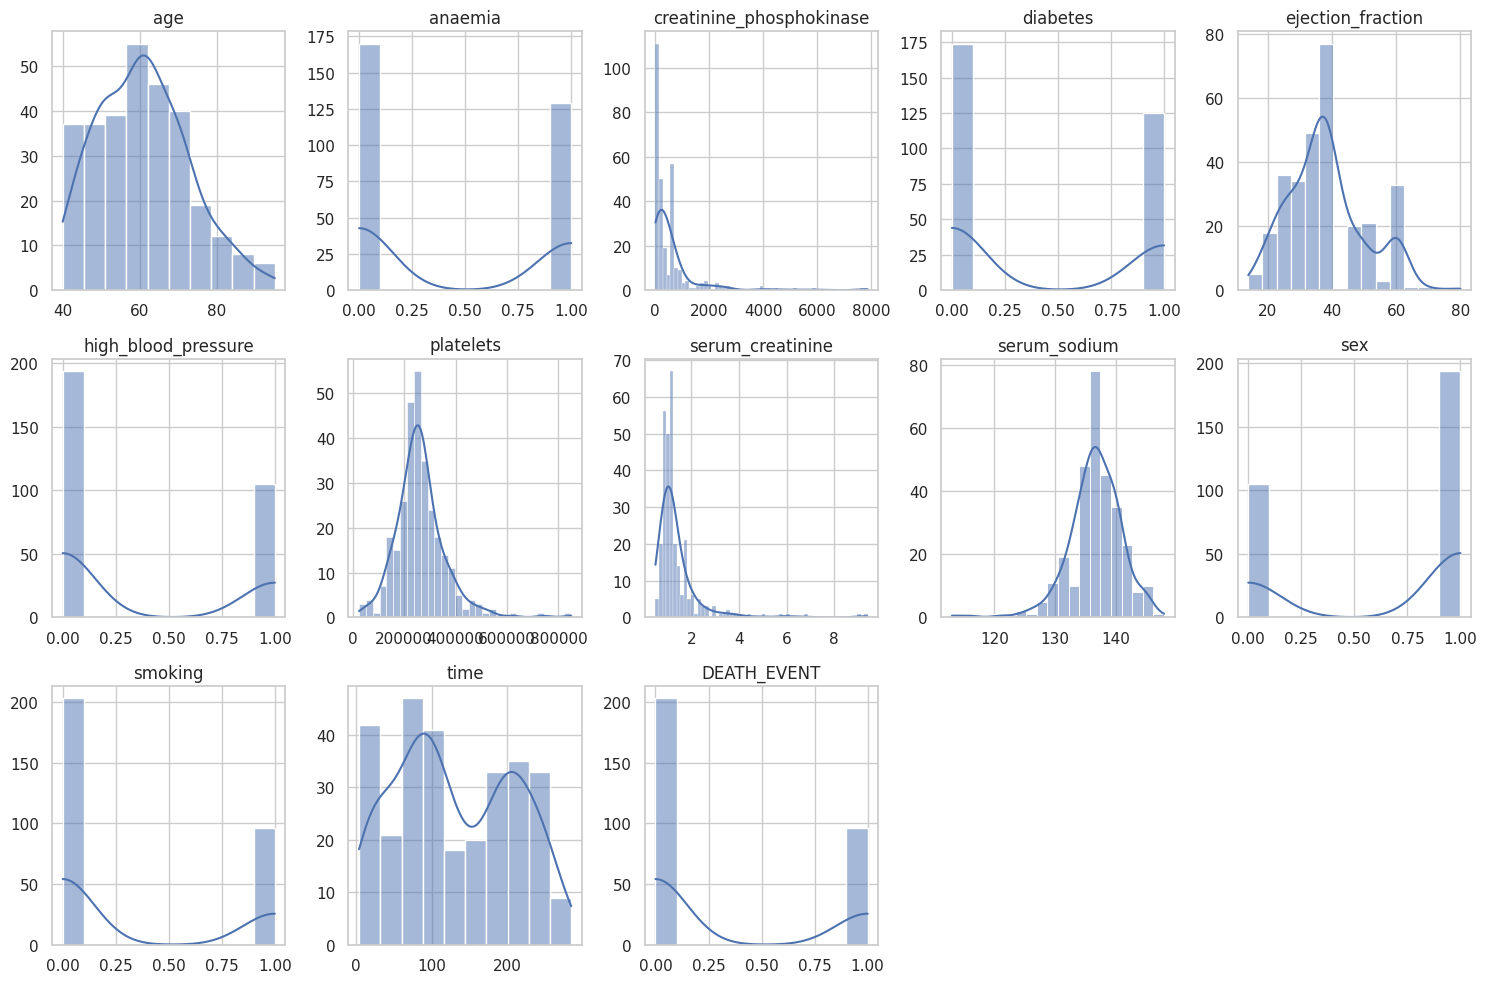

In [11]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot histograms for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 5, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


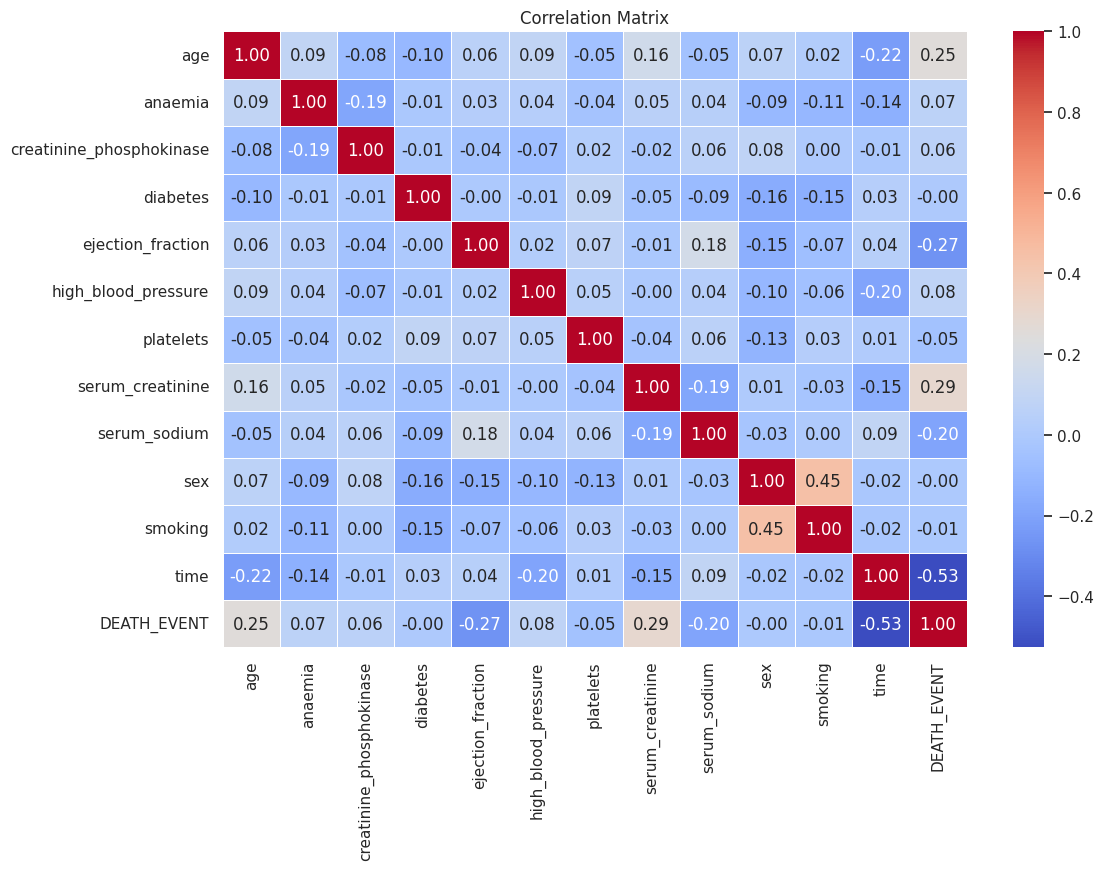

In [12]:
# Correlation

# Hitung matriks korelasi
corr_matrix = df.corr()

# Plot matriks korelasi sebagai heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [13]:
# Our Target : DEATH Event, has biggest negative correlation with time,
# And has biggest positive correlation with Age

In [14]:
# Pisahkan fitur (features) dan target (label)
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Buat model SVM - LINEAR
svm_model = SVC(kernel='linear', random_state=42)

# Latih model SVM dengan data latih
svm_model.fit(X_train, y_train)

# Prediksi label untuk data uji
y_pred = svm_model.predict(X_test)

In [16]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfussion Matrix:\n", conf)

Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.91      0.81        35
           1       0.81      0.52      0.63        25

    accuracy                           0.75        60
   macro avg       0.77      0.72      0.72        60
weighted avg       0.76      0.75      0.74        60


Confussion Matrix:
 [[32  3]
 [12 13]]


In [17]:
# Set hyperparameters
hyperparameters = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001]},
    {'kernel': ['poly'], 'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4]},
]


# List to store models and their evaluation results
models = []

In [ ]:
# Iterate through each set of hyperparameters
for params in hyperparameters:
    # Create SVM model
    svm_model = SVC()

    # Perform grid search cross-validation
    grid_search = GridSearchCV(estimator=svm_model, param_grid=params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Predict label for test data
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Store model and evaluation results
    models.append((best_model, accuracy, report))

In [ ]:
# Print evaluation results for each model
for idx, (model, accuracy, report) in enumerate(models):
    print(f"Model {idx+1}:")
    print("Best Parameters:", model.get_params())
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
    print("="*50)

In [ ]:
# https://orangedatamining.com/widget-catalog/evaluate/testandscore/